### Importing necessary libraries and creating a data set
The .csv.file containing results of a developer survey on StackOverflow is read

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')


### Getting to know the data set - Data Understanding
Checking the content of the columns Country and Gender. Their impact on fields of interest - when applying for a job - should be analysed. The fields of interest are represented by columns with the name 'AssessJob*'

In [2]:
print(df.head(10))

   Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   
5           6                                            Student   
6           7  Professional non-developer who sometimes write...   
7           8                             Professional developer   
8           9                             Professional developer   
9          10                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              N

In [3]:
print(df.columns)

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)


In [4]:
print(df['Country'].value_counts())

United States                     4364
India                             1557
United Kingdom                    1424
Germany                           1337
Canada                             874
Poland                             694
France                             522
Australia                          399
Netherlands                        373
Israel                             338
Russian Federation                 330
Spain                              312
Italy                              304
Sweden                             267
Brazil                             259
Romania                            251
Switzerland                        242
Austria                            190
Slovenia                           190
Iran                               174
Czech Republic                     167
Pakistan                           160
Ukraine                            148
Turkey                             146
Belgium                            138
Ireland                  

In [5]:
print(df['Gender'].value_counts())

Male                                                       11664
Female                                                       970
Other                                                         73
Gender non-conforming                                         54
Male; Other                                                   42
Female; Transgender                                           28
Transgender                                                   20
Male; Gender non-conforming                                   19
Female; Gender non-conforming                                 11
Male; Female                                                   5
Transgender; Gender non-conforming                             5
Male; Transgender                                              4
Male; Female; Transgender; Gender non-conforming; Other        4
Female; Transgender; Gender non-conforming                     3
Male; Female; Transgender                                      2
Male; Female; Transgender

### The next cells contains some methods which will be used during the analysis - Data Preparation
Details of the methods will be described in the methods' docstring

Method for renaming of columns

In [6]:
def rename_columns(data_frame,to_replace,replaced_by):
    
    """Renames the column name in order to get a more readable representation.

    Args:
        data_frame (pd.DataFrame): data frame containing the columns to be adjusted
        to_replace (str): (Sub-)string in the column name to be replaced
        replaced_by (str): String used for replacing the former (Sub-)string
        
    Returns:
        data_frame (pd.DataFrame): data frame with adjusted column names
        
    """
    
    data_frame.columns = data_frame.columns.str.replace(to_replace, replaced_by)
    
    return data_frame

Method for replacing categorical by numeric values

In [7]:
def replace_cat_by_num(data_frame):
    
    """Replaces categorical values of variables with numeric values

    Args:
        data_frame (pd.DataFrame): data frame containing categorical variables columns to be adjusted
          
    Returns:
        data_frame (pd.DataFrame): data frame where categorical variables are replaced
        
    """
    
    data_frame = data_frame.replace(['Very important','Important','Somewhat important','Not very important','Not at all important'],[5,4,3,2,1])
    
    return data_frame

Method for retrieving a data frame containing top n fields of interest, based on their relevance for job candidates

In [8]:
def get_topn(data_frame,assessjob_list,sel_var,sel_list,top_n):
    
    """Replaces categorical values of variables with numeric values.

    Args:
        data_frame (pd.DataFrame): data frame to be converted
        assessjob_list (list): list containing the fields of interest to be analyzed
        sel_var (str): column name used to filter the data frame
        sel_list (list): list of values used for the filter selection
        top_n (int): determines the amount of top fields of interest to be returned
          
    Returns:
        df_topn (pd.DataFrame): data frame containing the top n fields of interest and their relevance.
        
    """
    
    if (sel_var=='Overall'):
        df_topn = data_frame[assessjob_list]
    else:
        df_topn = data_frame[assessjob_list][data_frame[sel_var].isin(sel_list)]
        
    df_topn = replace_cat_by_num(df_topn)    
    
    rows = []
    for column_name in df_topn:
        rows.append([column_name,df_topn[column_name].mean()])
   
    df_topn = pd.DataFrame(rows,columns=['Field','Relevance']).sort_values('Relevance',ascending=False).head(top_n)
    
    return df_topn
    


### Putting it all together
First of all, let's rename the column names of the original data set in order to provide a more compact view within the visualizations

In [9]:
df = rename_columns(df,'AssessJob','')

The relevant columns in the dataset representing the fields of interest for job candidates - when applying for a job - need to be defined.

In [10]:
list_of_values = ['Industry','Role','Exp','Dept','Tech','Projects','Compensation','Office','Commute','Remote','Leaders','ProfDevel','Diversity','Product','Finances']

#### Overall analysis - What are the most relevant fields of interest for job candidates?
Let's have a look at the top ten fields of interest, independent from any selection or filtering.

[Text(0.5,1,'Overall')]

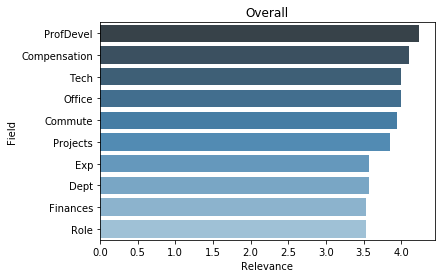

In [11]:
df_overall=get_topn(df,list_of_values,'Overall',['Overall'],10)
sns.barplot(data=df_overall,y='Field',x='Relevance',palette="Blues_d").set(title='Overall')

#### Analysis based on gender - Are there differences between male and female job candidates?
Let's have a look at the top five fields of interest for male job candidates.

[Text(0.5,1,'Male')]

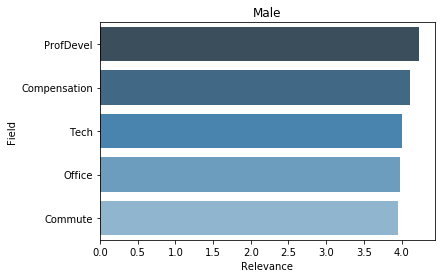

In [12]:
df_male=get_topn(df,list_of_values,'Gender',['Male'],5)
sns.barplot(data=df_male,y='Field',x='Relevance',palette="Blues_d").set(title='Male')

Let's have a look at the top five fields of interest for female job candidates.

[Text(0.5,1,'Female')]

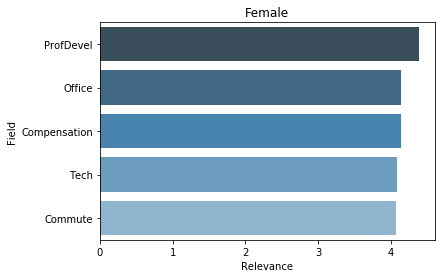

In [13]:
df_female=get_topn(df,list_of_values,'Gender',['Female'],5)
sns.barplot(data=df_female,y='Field',x='Relevance',palette="Blues_d").set(title='Female')

As the top five interests of male and female job candidates overlap completely, a comparison between the two genders can be visualized - in order to see the nuances.

AxesSubplot(0.125,0.125;0.775x0.755)


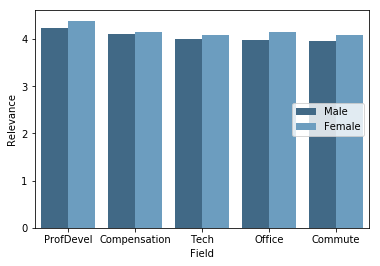

In [14]:
df_male['Gender']='Male'
df_female['Gender']='Female'
frames=[df_male,df_female]
df_gender=pd.concat(frames)
plt=sns.barplot('Field','Relevance','Gender',df_gender,palette="Blues_d")
plt.legend(loc='center right')
print(plt)


Obviously, the gender doesn't have a deciding impact on the interests. If - inspite of this fact - HR recruting tends to personalize job interviews, it should take into account the following ideas.
Besides focussing on opportunities for professional development which holds true for men and women:
- In case of female candidates, you could highlight the office environment. 
- In case of male candidates, you could highlight the compensation and benefits ordered.

#### Analysis based on country - Are there differences between job candidates from India, Germany and the US?
Let's have a look at the top five fields of interest for job candidates in India.

[Text(0.5,1,'India')]

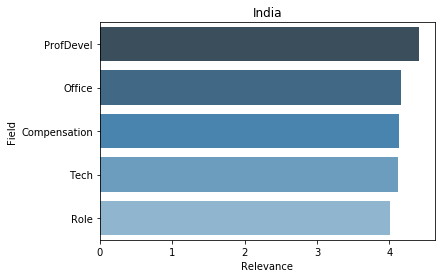

In [15]:
df_india=get_topn(df,list_of_values,'Country',['India'],5)
sns.barplot(data=df_india,y='Field',x='Relevance',palette="Blues_d").set(title='India')


Let's have a look at the top five fields of interest for job candidates in Germany.

[Text(0.5,1,'Germany')]

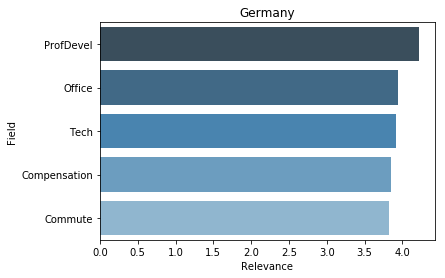

In [16]:
df_germany=get_topn(df,list_of_values,'Country',['Germany'],5)
sns.barplot(data=df_germany,y='Field',x='Relevance',palette="Blues_d").set(title='Germany')

Let's have a look at the top five fields of interest for job candidates in United States.

[Text(0.5,1,'United States')]

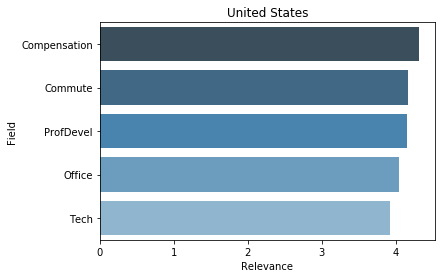

In [17]:
df_us=get_topn(df,list_of_values,'Country',['United States'],5)
sns.barplot(data=df_us,y='Field',x='Relevance',palette="Blues_d").set(title='United States')

When comparing Germany to the overall picture, it is obvious that professional development is the most important field of interest. In terms of more personalized job offers you could highlight successful projects of your company instead of commuting circumstances.

Having a look at India, it shows a quite similar behaviour as Germany. A possible customizing could be the highlighting of the future role for the job candidate.

When it comes to the analysis of potential employees in the US, the most obvious deviation from the overall picture is the most relevant field. In every case, HR recruiting should highlight a convincing package of compensation and benefits .